In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os

In [2]:
# ========================================
# 경로 설정 (여기를 수정하세요)
# ========================================
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/cifar10_data'  # CIFAR-10 데이터를 저장할 경로

# 데이터 디렉토리 생성
os.makedirs(DATA_DIR, exist_ok=True)

In [3]:
# --- CIFAR-10 로드 (자동으로 캐싱) ---
cifar10_path = os.path.join(DATA_DIR,'cifar-10-batches-py')

if os.path.exists(cifar10_path):
    print(f"✓ 기존 데이터 발견: {cifar10_path}")
    print("저장된 데이터를 로드합니다...")
else:
    print(f"데이터가 없습니다. {DATA_DIR}에 다운로드합니다...")

# 데이터 로드 (없으면 자동 다운로드 후 캐싱)
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

데이터가 없습니다. /content/drive/MyDrive/Colab Notebooks/cifar10_data에 다운로드합니다...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [4]:
# 클래스 이름 정의
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# 사용할 클래스 선택
selected_classes = ['cat','dog','horse']
selected_idx = [class_names.index(c) for c in selected_classes]

In [5]:
# --- 해당 클래스만 필터링 ---
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

In [6]:
# 라벨을 0~2로 다시 매핑
label_map = {v: i for i, v in enumerate(selected_idx)}
y_train = np.array([label_map[int(y)] for y in y_train])
y_test = np.array([label_map[int(y)] for y in y_test])

/tmp/ipython-input-1927283414.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)] for y in y_train])
/tmp/ipython-input-1927283414.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)] for y in y_test])


In [7]:
# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
# 4. CNN 모델 생성
model = models.Sequential([
    # 입력 이미지의 형태는 (32, 32, 3) 입니다. (32x32 크기, 3개의 컬러 채널)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    # 최종 분류를 위해 1차원으로 펼치기
    layers.Flatten(),

    layers.Dropout(0.5),

    # Dense 층 (분류기)
    layers.Dense(64, activation='relu'),
    # 최종 출력: 3개 클래스('고양이', '개', '말') 중 하나로 분류
    layers.Dense(3, activation='softmax')
])

# 모델 구조 요약
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,579 (877.26 KB)

 Trainable params: 224,579 (877.26 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 5. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 라벨이 0,1,2 정수이므로 사용
              metrics=['accuracy'])

In [15]:
# 6. 모델 학습
# 준비된 데이터로 모델을 학습시킵니다.
history = model.fit(x_train, y_train,
                    epochs=20,          # 20번 반복 학습
                    validation_split=0.2) # 학습 데이터 중 20%는 검증용으로 사용

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4339 - loss: 1.0285 - val_accuracy: 0.6183 - val_loss: 0.8142
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6166 - loss: 0.8051 - val_accuracy: 0.6697 - val_loss: 0.7236
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6564 - loss: 0.7269 - val_accuracy: 0.6957 - val_loss: 0.6798
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7009 - loss: 0.6624 - val_accuracy: 0.6990 - val_loss: 0.6813
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7225 - loss: 0.6285 - val_accuracy: 0.7287 - val_loss: 0.6197
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7431 - loss: 0.5846 - val_accuracy: 0.6813 - val_loss: 0.7356
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7584 - loss: 0.5483 - val_accuracy: 0.7320 - val_loss: 0.5937
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7858 - loss: 0.5149 - val_accuracy: 0.

In [16]:
# 7. 모델 평가
# 학습이 끝난 모델을 테스트 데이터로 최종 평가합니다.
print("\n[ 최종 모델 평가 ]")
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"테스트 데이터 정확도: {accuracy:.4f}")


[ 최종 모델 평가 ]
94/94 - 0s - 2ms/step - accuracy: 0.7723 - loss: 0.6438
테스트 데이터 정확도: 0.7723


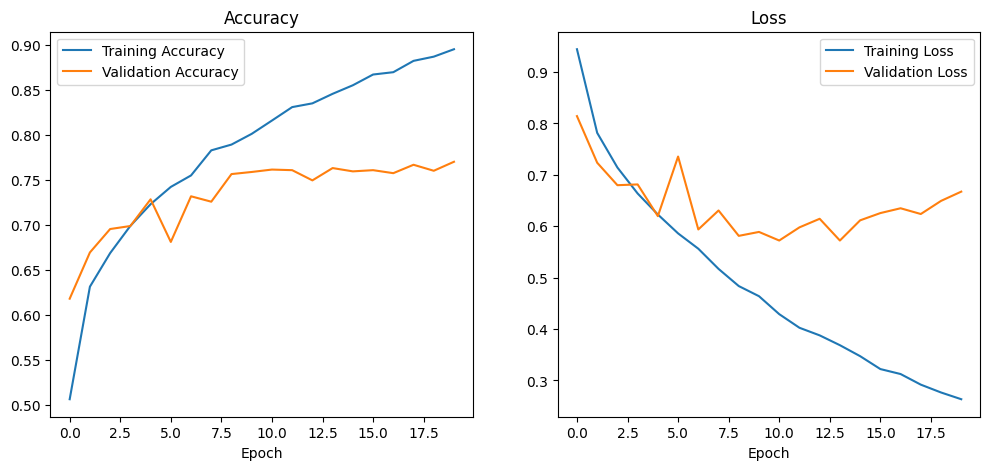

In [17]:
# 8. 학습 과정 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()